<center><b>In the name of God</b></center>

<b>Course</b>: Statistical Pattern Recognition
<br>
<b>Description:</b> HomeWork 2 | Question 6
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

In [1]:
# Import Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import glob
from PIL import Image


# a

In [2]:
def all_path(part, setnumber, raw):
    if part=="train":
        if raw:
            return glob.glob(f"./pratheepan/train/set{setnumber}/images/*")
        else:
            return glob.glob(f"./pratheepan/train/set{setnumber}/groundtruth/*.png")
    elif part=="test":
        if raw:
            return glob.glob(f"./pratheepan/test/images/*.jpg")
        else:
            return glob.glob(f"./pratheepan/test/groundtruth/*.png")

In [3]:
def load_img_data(path):
    """ Load an image and convert it to its data"""
    im = Image.open(path)
    data = np.array([[im.getpixel((i, j)) for i in range(im.size[0])] for j in range(im.size[1])])
    return data

In [4]:
priors = [0, 0]

for path in all_path("train", 1, False):
    img_data = load_img_data(path)
    
    for pixel_array in img_data:
        for pixel in pixel_array:
            if pixel[0] == 0:
                priors[0] += 1
            else:
                priors[1] += 1

all_pixels = priors[0] + priors[1]
priors = [priors[0]/all_pixels, priors[1]/all_pixels]

# c

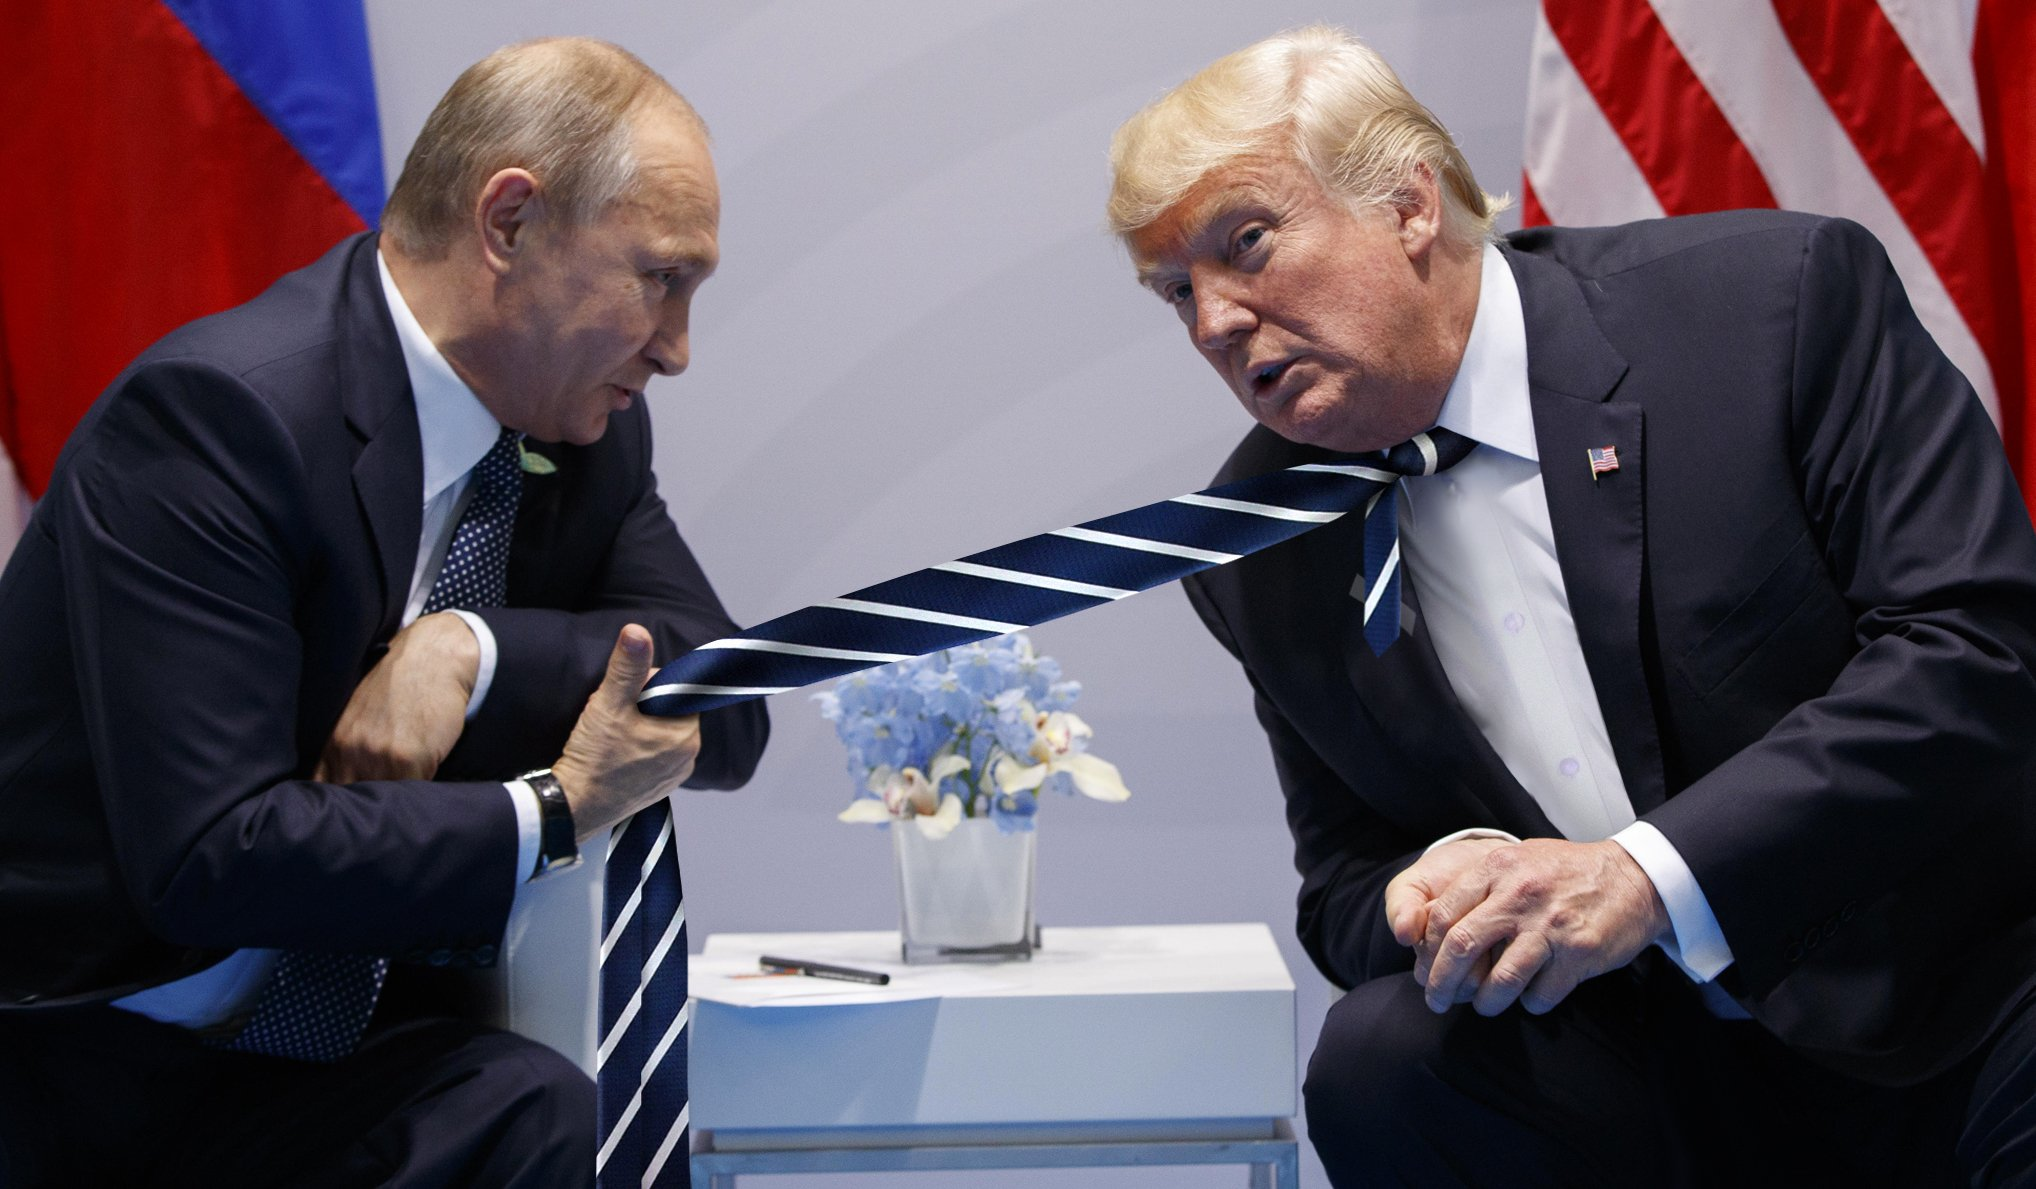

In [5]:
Image.open("./trump_tie_1.jpg")

In [25]:
def create_feature(pixel):
#     return pixel[0] + pixel[1] + pixel[2]
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

In [26]:
class_data = [[], []]
raw_data_path = all_path("train", 1, True)
label_data_path = all_path("train", 1, False)

for path_index in range(len(raw_data_path)):
    raw_img_data = load_img_data(raw_data_path[path_index])
    label_img_data = load_img_data(label_data_path[path_index])
    
    for i, pixel_array in enumerate(raw_img_data):
        for j, pixel in enumerate(pixel_array):
            feature = create_feature(pixel)
            if label_img_data[i][j][0] == 0:
                class_data[0].append(feature)
            else:
                class_data[1].append(feature)

In [27]:
class_mean = [np.mean(class_data[0]), np.mean(class_data[1])]
class_var = [np.var(class_data[0]), np.var(class_data[1])]

In [28]:
print(class_mean)
print(class_var)

[112.20370141597832, 151.98738890748305]
[6937.796028848693, 2171.869102394161]


In [29]:
def normal(var, mean, x):
    return 1 / np.sqrt(2*np.pi*var) * np.exp(-.5 * ((x-mean)**2) / var )

In [30]:
priors

[0.724924508675029, 0.27507549132497106]

In [46]:
def predict(x):
    return  (normal(class_var[0], class_mean[0], x) * priors[0]) / (normal(class_var[1], class_mean[1], x) * priors[1]) <  2

In [47]:
output = []
for pixel_array in load_img_data("./trump_tie_1.jpg"):
    output_array = []
    for pixel in pixel_array:
        feature = create_feature(pixel)
        if predict(feature):
            output_array.append(255)
        else:
            output_array.append(0)
    output.append(output_array)

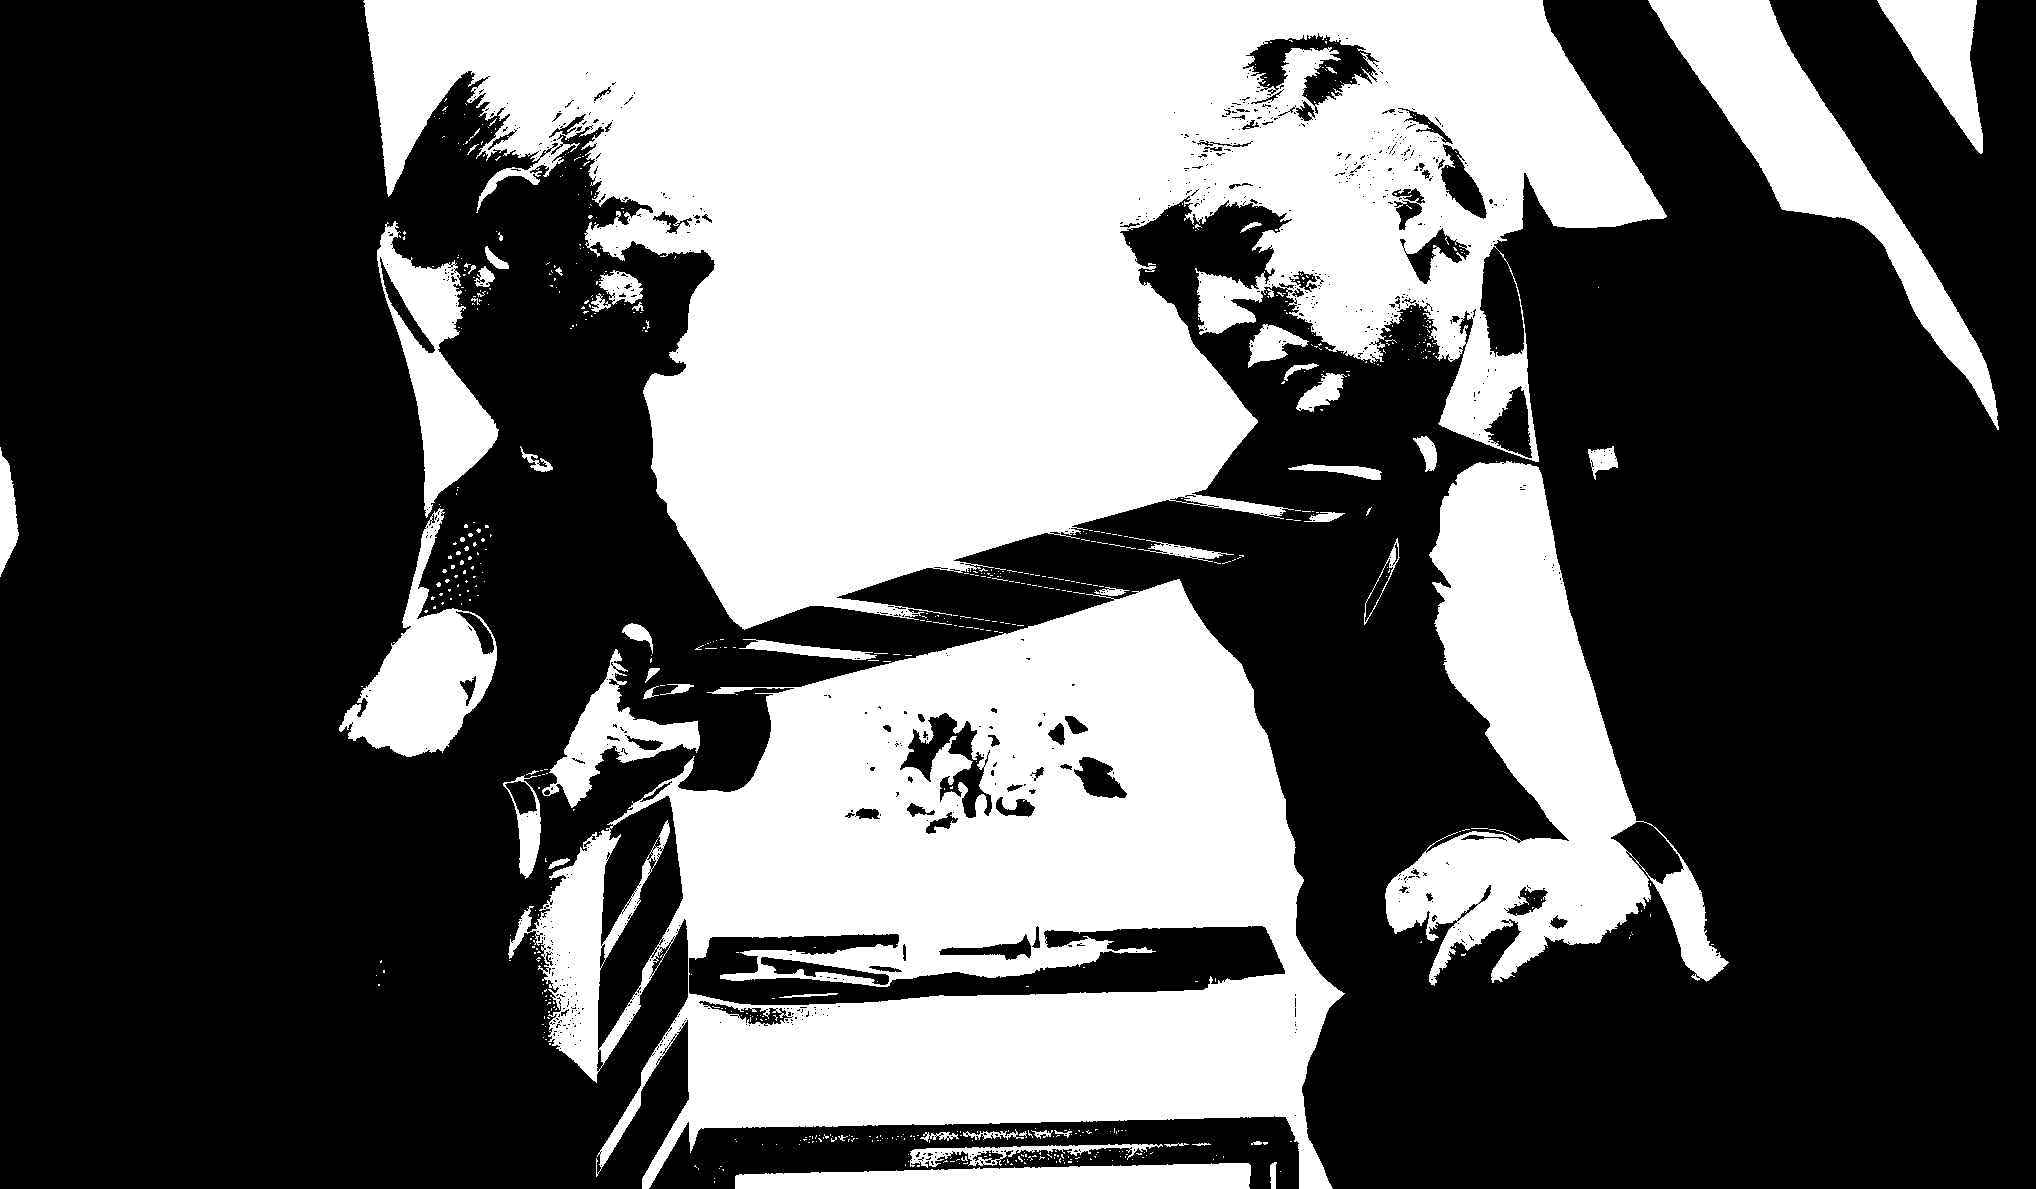

In [48]:
img = Image.fromarray(np.uint8(output) , 'L')
display(img)